# NLP Tradition ML vs Deep learning

**Mission**: I always want to know the difference in traditional NLP vs DL. Now I recently learned how to do NLP using tensorflow, I would like to experiment the difference in tridition ML vs DL.

**Data**: I used the movie review data from IMDB, and I will run sentiment analysis to see weather its a positive review or a negative review. I will limit the vocab size 10000, So I don't have to wait super long for training.


## Preprocessing

### load data


In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, CuDNNLSTM
from tensorflow.keras.layers import Dropout, Dense, GlobalAveragePooling1D
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

print(tf.__version__)

1.12.0


In [2]:
vocab_size = 10000
(train_data, train_labels), (test_data, test_labels) = \
       keras.datasets.imdb.load_data(num_words=vocab_size)

17465344/17464789 [==============================] - 0s 0us/step


In [3]:
# A dictionary mapping words --> integer index
word_index = keras.datasets.imdb.get_word_index()

# Shift word index by 3 because we want to add special words
word_index = {k:(v+3) for k,v in word_index.items()} 
word_index["<PAD>"] = 0  # padding
word_index["<SOS>"] = 1  # start of sequence
word_index["<UNK>"] = 2  # unknown (out of the top 10,000 most frequent words)

1646592/1641221 [==============================] - 0s 0us/step


In [0]:
# Build another dictionary of mapping integer --> words 
reverse_word_index = dict([(v, k) for (k, v) in word_index.items()])

# Create a helper function to convert the integer to words
# also limit max length
def decode_review(text):
  words = [reverse_word_index.get(i, "<UNK>") for i in text]
  fixed_width_string = []
  # limit max length = 10
  for w_pos in range(len(words)):
    fixed_width_string.append(words[w_pos])
    if (w_pos+1) % 10 == 0:
      fixed_width_string.append('\n')
  return ' '.join(fixed_width_string)

### Get data ready for bag of words

In [0]:
review_train=[decode_review(i) for i in train_data]
review_test=[decode_review(i) for i in test_data]

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words = 'english', max_features=10000)

# Train the model with your training data
vectors_train = vectorizer.fit_transform(review_train).toarray()
# Get the vocab of your tfidf
words = vectorizer.get_feature_names()
# Use the trained model to transform your test data
vectors_test = vectorizer.transform(review_test).toarray()

### Get Data ready for DL


In [0]:
#set the max lenth 150 and implement frount padding for all the reviews
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='pre',
                                                        truncating='pre',
                                                        maxlen=150)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='pre',
                                                       truncating='pre',
                                                       maxlen=150)

In [6]:
# Let's see what does the review look like after padding
print(decode_review(train_data[5]))

<PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> 
 <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> 
 <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> 
 <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> 
 <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> 
 <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> 
 <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> 
 <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> 
 <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> 
 <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> 
 <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <SOS> begins better 
 than it ends funny that the russian submarine crew <UNK> 
 all other actors it's like those scenes where documentary shots 
 br br spoiler part the message <UNK> was contrary to 
 the whole story it just does not <UNK> br br 



In [0]:
# create validation set
x_val = train_data[:1000]
partial_x_train = train_data[1000:10000]

y_val = train_labels[:1000]
partial_y_train = train_labels[1000:10000]

In [0]:
import pickle
pickle.dump(train_data, open('train_data.pkl', 'wb'))
pickle.dump(train_data, open('train_data.pkl', 'wb'))
pickle.dump(train_labels, open('train_labels,pkl', 'wb'))
pickle.dump(test_labels, open('test_labels.pkl', 'wb'))

In [0]:
import 


## Tradition ML

In [0]:
# Import metrics functions from sklearn
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, roc_auc_score

In [0]:

# Helper method to print metric scores    
def get_performance_metrics(y_train, p_train_pred, y_test, p_test_pred, threshold=0.5):
    metric_names = ['AUC','Accuracy','Precision','Recall','f1-score']
    metric_values_train = [roc_auc_score(y_train, p_train_pred),
                    accuracy_score(y_train, p_train_pred>threshold),
                    precision_score(y_train, p_train_pred>threshold),
                    recall_score(y_train, p_train_pred>threshold),
                    f1_score(y_train, p_train_pred>threshold)
                   ]
    metric_values_test = [roc_auc_score(y_test, p_test_pred),
                    accuracy_score(y_test, p_test_pred>threshold),
                    precision_score(y_test, p_test_pred>threshold),
                    recall_score(y_test, p_test_pred>threshold),
                    f1_score(y_test, p_test_pred>threshold)
                   ]
    all_metrics = pd.DataFrame({'metrics':metric_names,
                                'train':metric_values_train,
                                'test':metric_values_test},columns=['metrics','train','test']).set_index('metrics')
    print(all_metrics)
    

In [0]:
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred):
    roc_auc_train = roc_auc_score(y_train, p_train_pred)
    fpr_train, tpr_train, _ = roc_curve(y_train, p_train_pred)

    roc_auc_test = roc_auc_score(y_test, p_test_pred)
    fpr_test, tpr_test, _ = roc_curve(y_test, p_test_pred)
    plt.figure()
    lw = 2
    plt.plot(fpr_train, tpr_train, color='green',
             lw=lw, label='ROC Train (AUC = %0.4f)' % roc_auc_train)
    plt.plot(fpr_test, tpr_test, color='darkorange',
             lw=lw, label='ROC Test (AUC = %0.4f)' % roc_auc_test)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

### NB classifier

In [0]:
from sklearn.naive_bayes import MultinomialNB
model_nb = MultinomialNB()
model_nb.fit(vectors_train, train_labels)
# Get score for training set
train_score = model_nb.score(vectors_train, train_labels)
test_score = model_nb.score(vectors_test, test_labels)
print("Train Score {0:3} Test Score {1:3}".format(train_score, test_score))

Train Score 0.88068 Test Score 0.83756


              train      test
metrics                      
AUC        0.950533  0.917354
Accuracy   0.880680  0.837560
Precision  0.881994  0.858954
Recall     0.878960  0.807760
f1-score   0.880474  0.832571


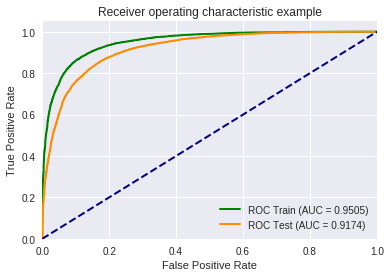

In [0]:
# print model results
p_train_pred = model_nb.predict_proba(vectors_train)[:,1]
p_test_pred = model_nb.predict_proba(vectors_test)[:,1]

get_performance_metrics(train_labels, p_train_pred, test_labels, p_test_pred)
plot_roc_curve(train_labels, p_train_pred, test_labels, p_test_pred)

### logistic Regression

In [0]:
from sklearn.linear_model import LogisticRegression

model_lrc = LogisticRegression()
model_lrc.fit(vectors_train, train_labels)

train_score = model_lrc.score(vectors_train, train_labels)
test_score = model_lrc.score(vectors_test, test_labels)

print("For Logistic Regression: Train Score {0:3} Test Score {1:3}".format(train_score, test_score))


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


For Logistic Regression: Train Score 0.92372 Test Score 0.87968


              train      test
metrics                      
AUC        0.976449  0.949784
Accuracy   0.923720  0.879680
Precision  0.915640  0.876547
Recall     0.933440  0.883840
f1-score   0.924454  0.880178


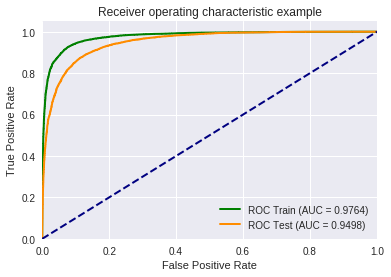

In [0]:
p_train_pred_lrc = model_lrc.predict_proba(vectors_train)[:,1]
p_test_pred_lrc = model_lrc.predict_proba(vectors_test)[:,1]

get_performance_metrics(train_labels, p_train_pred_lrc, test_labels, p_test_pred_lrc)
plot_roc_curve(train_labels, p_train_pred_lrc, test_labels, p_test_pred_lrc)

### Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators = 50, max_depth = 50,
                                  min_samples_leaf = 5, oob_score=True)
model_rf.fit(vectors_train, train_labels)

train_score = model_rf.score(vectors_train, train_labels)
test_score = model_rf.score(vectors_test, test_labels)

print("For RandomForestClassifier: Train Score {0:3} Test Score {1:3}"
      .format(train_score, test_score))



For RandomForestClassifier: Train Score 0.92528 Test Score 0.83632


              train      test
metrics                      
AUC        0.980310  0.914961
Accuracy   0.925280  0.836320
Precision  0.910565  0.831598
Recall     0.943200  0.843440
f1-score   0.926595  0.837477


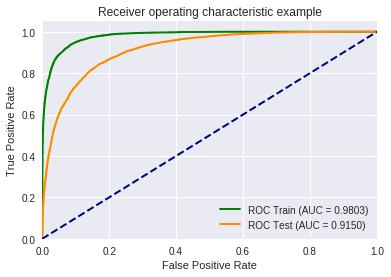

In [0]:
p_train_pred_rf = model_rf.predict_proba(vectors_train)[:,1]
p_test_pred_rf = model_rf.predict_proba(vectors_test)[:,1]

get_performance_metrics(train_labels, p_train_pred_rf, test_labels, p_test_pred_rf)
plot_roc_curve(train_labels, p_train_pred_rf, test_labels, p_test_pred_rf)

### AdaBoost

In [0]:
from sklearn.ensemble import AdaBoostClassifier
model_ada = AdaBoostClassifier(n_estimators = 50, learning_rate=1)
model_ada.fit(vectors_train, train_labels)


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.1, n_estimators=50, random_state=None)

In [0]:

train_score = model_ada.score(vectors_train, train_labels)
test_score = model_ada.score(vectors_test, test_labels)

print("For AdaClassifier: Train Score {0:3} Test Score {1:3}"
      .format(train_score, test_score))

For AdaClassifier: Train Score 0.73468 Test Score 0.73968


              train      test
metrics                      
AUC        0.820061  0.823324
Accuracy   0.734680  0.739680
Precision  0.683378  0.689404
Recall     0.874560  0.872400
f1-score   0.767239  0.770182


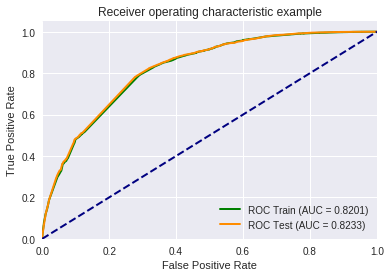

In [0]:
p_train_pred_ada = model_ada.predict_proba(vectors_train)[:,1]
p_test_pred_ada = model_ada.predict_proba(vectors_test)[:,1]

get_performance_metrics(train_labels, p_train_pred_ada, test_labels, p_test_pred_ada)
plot_roc_curve(train_labels, p_train_pred_ada, test_labels, p_test_pred_ada)

### XGBoost

In [0]:
from xgboost import XGBClassifier
model_xgb = XGBClassifier(  n_jobs = -1 )
model_xgb.fit(vectors_train, train_labels)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [0]:

train_score = model_xgb.score(vectors_train, train_labels)
test_score = model_xgb.score(vectors_test, test_labels)

print("For XGBClassifier: Train Score {0:3} Test Score {1:3}"
      .format(train_score, test_score))

For XGBClassifier: Train Score 0.81988 Test Score 0.80504


              train      test
metrics                      
AUC        0.907241  0.892292
Accuracy   0.819880  0.805040
Precision  0.781050  0.770349
Recall     0.888960  0.869200
f1-score   0.831519  0.816794


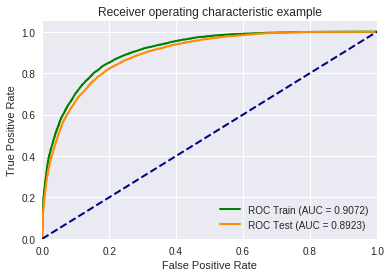

In [0]:
p_train_pred_xgb = model_xgb.predict_proba(vectors_train)[:,1]
p_test_pred_xgb = model_xgb.predict_proba(vectors_test)[:,1]

get_performance_metrics(train_labels, p_train_pred_xgb, test_labels, p_test_pred_xgb)
plot_roc_curve(train_labels, p_train_pred_xgb, test_labels, p_test_pred_xgb)

## Deep Learning

Let's first start with a simple NN. enbedding+ fully connected layer. 

In [9]:

model = keras.Sequential()
# Embedding layer maps each of the 10000 words to 100-d embeddings
model.add(Embedding(vocab_size, 100))
# Average the embeddings
model.add(GlobalAveragePooling1D())
# 1 Fully-connected layer
model.add(Dense(16, activation=tf.nn.relu))
# 2 Fully-connected layer
model.add(Dense(1, activation=tf.nn.sigmoid))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 100)         1000000   
_________________________________________________________________
global_average_pooling1d (Gl (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 16)                1616      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 1,001,633
Trainable params: 1,001,633
Non-trainable params: 0
_________________________________________________________________


In [0]:
# we used the adam optimizer
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [11]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=100,
                    validation_data=(x_val, y_val))

Train on 9000 samples, validate on 1000 samples
Epoch 1/10
9000/9000 [==============================] - 3s 330us/step - loss: 0.6675 - acc: 0.6522 - val_loss: 0.6092 - val_acc: 0.8040
Epoch 2/10
9000/9000 [==============================] - 2s 246us/step - loss: 0.4923 - acc: 0.8366 - val_loss: 0.4084 - val_acc: 0.8350
Epoch 3/10
9000/9000 [==============================] - 2s 245us/step - loss: 0.3124 - acc: 0.8950 - val_loss: 0.3329 - val_acc: 0.8550
Epoch 4/10
9000/9000 [==============================] - 2s 241us/step - loss: 0.2278 - acc: 0.9247 - val_loss: 0.3135 - val_acc: 0.8590
Epoch 5/10
9000/9000 [==============================] - 2s 242us/step - loss: 0.1754 - acc: 0.9446 - val_loss: 0.3124 - val_acc: 0.8520
Epoch 6/10
9000/9000 [==============================] - 2s 247us/step - loss: 0.1363 - acc: 0.9597 - val_loss: 0.3228 - val_acc: 0.8540
Epoch 7/10
9000/9000 [==============================] - 2s 242us/step - loss: 0.1064 - acc: 0.9719 - val_loss: 0.3462 - val_acc: 0.8460


In [12]:
results = model.evaluate(test_data, test_labels)
print(results)

25000/25000 [==============================] - 1s 41us/step
[0.42912014605998994, 0.84788]


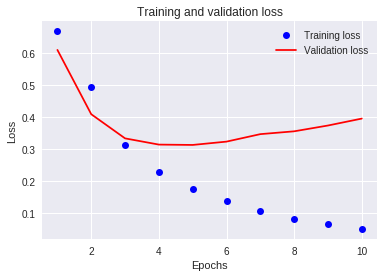

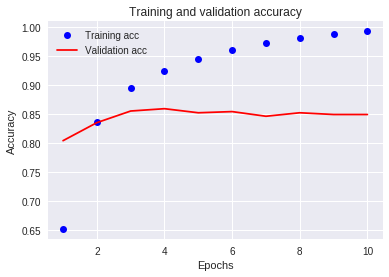

In [13]:
def plot_hist(history):
    history_dict = history.history
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)
    # plot for loss
    plt.clf()   # clear figure
    # "bo" is for "blue dot"
    plt.plot(epochs, loss, 'bo', label='Training loss')
    # r is for "red solid line"
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    # plot for accuracy
    plt.clf()   # clear figure
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

plot_hist(history)

#### Deal with overfitting

As we see that the above model clearly overfits. after the 3rd epoc, the validation lost tends to increase。 here  we add dropouts to the fully connected layer


In [15]:
# Clear previous model
model = None
K.clear_session()
model = keras.Sequential()
# Embedding layer maps each of the 10000 words to 100-d embeddings
model.add(Embedding(vocab_size, 100))
# Average the embeddings
model.add(GlobalAveragePooling1D())
# 1 Fully-connected layer
model.add(Dense(16, activation=tf.nn.relu))

# Dropout layer
model.add(Dropout(0.2))

# 2 Fully-connected layer
model.add(Dense(1, activation=tf.nn.sigmoid))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 100)         1000000   
_________________________________________________________________
global_average_pooling1d (Gl (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 16)                1616      
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 1,001,633
Trainable params: 1,001,633
Non-trainable params: 0
_________________________________________________________________


Train on 9000 samples, validate on 1000 samples
Epoch 1/12
9000/9000 [==============================] - 2s 277us/step - loss: 0.6713 - acc: 0.6593 - val_loss: 0.6192 - val_acc: 0.7910
Epoch 2/12
9000/9000 [==============================] - 2s 253us/step - loss: 0.5267 - acc: 0.8260 - val_loss: 0.4410 - val_acc: 0.8480
Epoch 3/12
9000/9000 [==============================] - 2s 251us/step - loss: 0.3592 - acc: 0.8807 - val_loss: 0.3545 - val_acc: 0.8510
Epoch 4/12
9000/9000 [==============================] - 2s 255us/step - loss: 0.2691 - acc: 0.9062 - val_loss: 0.3249 - val_acc: 0.8620
Epoch 5/12
9000/9000 [==============================] - 2s 251us/step - loss: 0.2125 - acc: 0.9298 - val_loss: 0.3164 - val_acc: 0.8610
Epoch 6/12
9000/9000 [==============================] - 2s 252us/step - loss: 0.1732 - acc: 0.9456 - val_loss: 0.3209 - val_acc: 0.8550
Epoch 7/12
9000/9000 [==============================] - 2s 261us/step - loss: 0.1435 - acc: 0.9593 - val_loss: 0.3282 - val_acc: 0.8470


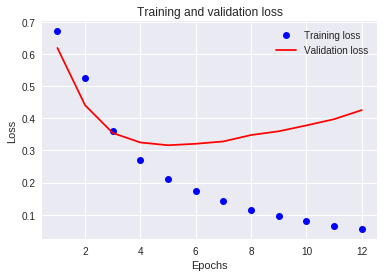

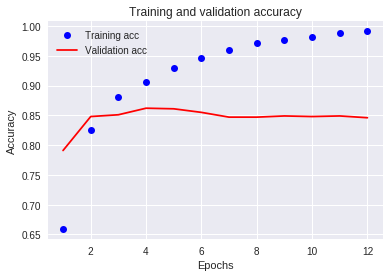

In [17]:
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=12,
                    batch_size=100,
                    validation_data=(x_val, y_val))
plot_hist(history)

In [18]:
results = model.evaluate(test_data, test_labels)
print(results)

25000/25000 [==============================] - 1s 44us/step
[0.46173048542022704, 0.84372]


Still seemed over fitting has reduced a little, but the overall performance not as good as I want. Next I would like to try LSTM

### LSTM

In [19]:
model = None
K.clear_session()
model = keras.Sequential()
model.add(Embedding(vocab_size, 100))

# Add a recurrent layer
model.add(LSTM(32, dropout=0.1, recurrent_dropout=0.3))
## or CuDNNLSTM
##model.add(CuDNNLSTM(32))
##

model.add(Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 100)         1000000   
_________________________________________________________________
lstm (LSTM)                  (None, 32)                17024     
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 1,017,057
Trainable params: 1,017,057
Non-trainable params: 0
_________________________________________________________________


Train on 9000 samples, validate on 1000 samples
Epoch 1/8
9000/9000 [==============================] - 26s 3ms/step - loss: 0.6432 - acc: 0.6326 - val_loss: 0.5221 - val_acc: 0.7680
Epoch 2/8
9000/9000 [==============================] - 25s 3ms/step - loss: 0.4469 - acc: 0.8082 - val_loss: 0.4903 - val_acc: 0.7730
Epoch 3/8
9000/9000 [==============================] - 25s 3ms/step - loss: 0.3521 - acc: 0.8534 - val_loss: 0.4858 - val_acc: 0.7860
Epoch 4/8
9000/9000 [==============================] - 25s 3ms/step - loss: 0.2974 - acc: 0.8807 - val_loss: 0.5330 - val_acc: 0.7520
Epoch 5/8
9000/9000 [==============================] - 25s 3ms/step - loss: 0.2480 - acc: 0.9022 - val_loss: 0.5534 - val_acc: 0.7770
Epoch 6/8
9000/9000 [==============================] - 25s 3ms/step - loss: 0.2214 - acc: 0.9141 - val_loss: 0.5797 - val_acc: 0.7650
Epoch 7/8
9000/9000 [==============================] - 25s 3ms/step - loss: 0.1954 - acc: 0.9287 - val_loss: 0.6408 - val_acc: 0.7620
Epoch 8/8
9000

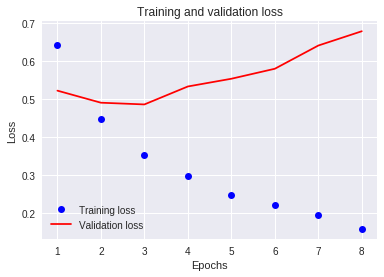

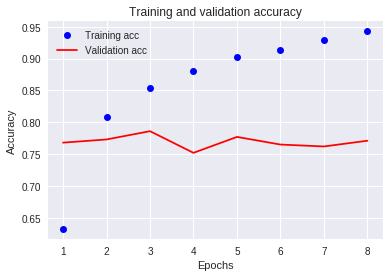

In [20]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.train.AdamOptimizer(),
              metrics=['accuracy'])
history = model.fit(partial_x_train, \
                    partial_y_train, \
                    epochs=8, \
                    batch_size=100, \
                    validation_data=(x_val, y_val))

plot_hist(history)

In [21]:
results = model.evaluate(test_data, test_labels)
print(results)

25000/25000 [==============================] - 26s 1ms/step
[0.6589774937057495, 0.7664]


We see that nueral network doesn't necessaryly perform better than traditional ML

### Transfer Learning

In [0]:
!pip install -q kaggle


In [24]:
from google.colab import files
k_config = files.upload()
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json
# !kaggle datasets download -d terenceliu4444/glove6b100dtxt
# !unzip glove6b100dtxt.zip

Saving glove.6B.100d.txt to glove.6B.100d.txt


In [0]:
pretrained_embedding_matrix = (np.random.rand(vocab_size, 100) - 0.5) / 1e4
## Initialize embeddings matrix to all zeros
# pretrained_embedding_matrix = np.zeros((vocab_size, 100))
## Load pretrained embeddings
with open('glove.6B.100d.txt') as f:
    for line in f:
        values = line.split()
        word = values[0]
        if word in word_index:
            embs = np.asarray(values[1:], dtype='float32')
            if word_index[word] >= vocab_size: continue
            pretrained_embedding_matrix[word_index[word]] = embs

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 100)         1000000   
_________________________________________________________________
global_average_pooling1d (Gl (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 16)                1616      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 1,001,633
Trainable params: 1,001,633
Non-trainable params: 0
_________________________________________________________________
Train on 9000 samples, validate on 1000 samples
Epoch 1/8
9000/9000 [==============================] - 2s 267us/step - loss: 0.6710 - acc: 0.6487 - val_loss: 0.6455 - val_acc: 0.6700
Epoch 2/8
9000/9000 [==============================] - 2s 248us/step - loss: 0.60

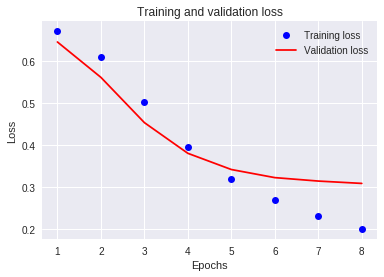

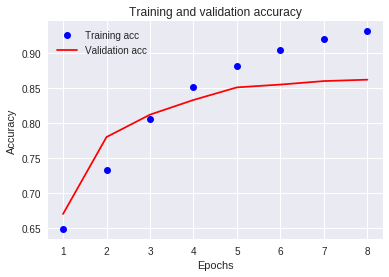

In [26]:
model = None
K.clear_session()
model = keras.Sequential()

# Embedding layer with pretrained embeddings
model.add(Embedding(vocab_size, 100, weights=[pretrained_embedding_matrix]))

model.add(GlobalAveragePooling1D())
model.add(Dense(16, activation=tf.nn.relu))
model.add(Dense(1, activation=tf.nn.sigmoid))
model.summary()
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=8,
                    batch_size=100,
                    validation_data=(x_val, y_val))
plot_hist(history)